# SEGMENTACIÓN DE CLIENTES COMPRADORES DE VINO




# About the Data

*The dataset contains information about marketing campaigns and transactions made by customers. The transactional data shows customers by last name and the offer of the campaign that they actually buyed. The data is presented as an Excel workbook.*

## Goal


*The general hypothesis is that 3 segments are sufficient to characterize all the wine customers. The main goal is to determine which type of costumers are in each segment.*

# LIBRERÍAS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DE DATA

In [ ]:
data_original = pd.read_csv(r"/content/k-means_exp.csv",sep=';')

data_original = data_original.drop(['item'],axis=1)

data_original.head()

,apellido,promocion,campaña,variedad,cantidad_min,descuento,origen
0,Smith,2,Enero,Pinot Noir,72,17,France
1,Smith,24,Septiembre,Pinot Noir,6,34,Italy
2,Johnson,17,July,Pinot Noir,12,47,Germany
3,Johnson,24,Septiembre,Pinot Noir,6,34,Italy
4,Johnson,26,Octubre,Pinot Noir,144,83,Australia


# PREPARAR DATA

## Codificar data

In [ ]:
# Copiar DataFrame
data = data_original.copy()

# Seleccionar columnas categóricas
categorical_columns = ['apellido']

# Codificador
encoder = OneHotEncoder()

# Aplicar codificador
encoded_categorical = encoder.fit_transform(data[categorical_columns]).toarray()

# Nombres de columnas
feature_names = encoder.get_feature_names_out(categorical_columns)

# Quitar prefijo de 'apellido_'
feature_names = [name.replace('apellido_', '') for name in feature_names]

# Convertir a DataFrame
encoded_categorical_data = pd.DataFrame(encoded_categorical, columns=feature_names)

# Regresar al DataFrame y quitar columnas categóricas iniciales
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, encoded_categorical_data], axis=1)

# Agrupar por promoción
data = data.groupby('promocion').sum(numeric_only=True).reset_index()

# Mantener columnas para clasificación
data = data.drop(['cantidad_min','descuento'],axis=1)

data


,promocion,Adams,Allen,Anderson,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Pivotear Tabla

In [ ]:
#Pivot al DataFrame
data_clean = data.T.reset_index()

data_clean.columns = data_clean.iloc[0]
data_clean = data_clean[1:]  # Remove the first row as it's now the header
data_clean = data_clean.rename(columns={'promocion': 'apellido'}).reset_index(drop=True)
#data_clean = data_clean.drop(['apellido'],axis=1)
data_clean

,apellido,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96,Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97,Wood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98,Wright,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Reducir variables mediante PCA

In [ ]:
# Definir componentes
pca = PCA(n_components=2)

# Aplicar transformación sin columna apellido
data_clean2 = data_clean.copy()
data_clean2 = data_clean.drop(['apellido'],axis=1)
data_pca = pca.fit_transform(data_clean2)

# Volver a Data Frame con Apellido como índice

data_pca = pd.DataFrame(data = data_pca, columns=['comp1','comp2'])
data_pca['apellido'] = data_clean['apellido']

data_pca

,comp1,comp2,apellido
0,1.007580,0.108215,Adams
1,-0.287539,0.044715,Allen
2,-0.392032,1.038391,Anderson
3,0.699477,-0.022542,Bailey
4,0.088183,-0.471695,Baker
...,...,...,...
95,-0.151666,-0.587844,Williams
96,0.688224,-0.013688,Wilson
97,-0.551215,-0.395670,Wood
98,-0.489805,-0.383307,Wright


# ALGORTIMO DE CLASIFICACIÓN

## Elegir número de clusters para clasificación

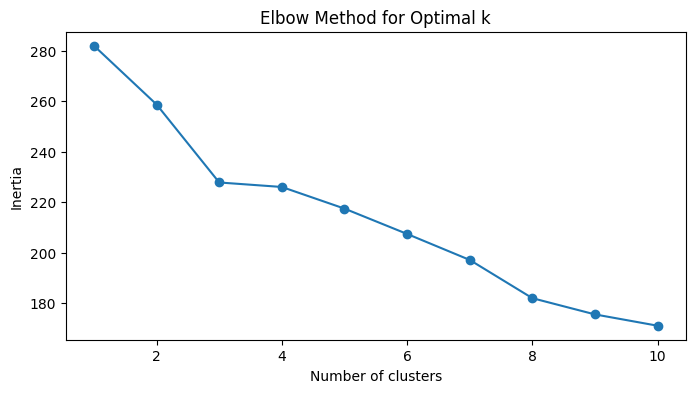

In [ ]:
# Cálculo de inercia
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=9)
    kmeans.fit(data_clean2)
    inertia.append(kmeans.inertia_)

# Graficar curva del codo
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

*La gráfica del codo da un cambio de pendiente para 3 clusters; sin embargo, se aprecia una menor distancia a los centros usando hasta 7 clusters. Se puede verificar el compartamiento haciendo gráficas de los valores PCA clasificados*

##Probar algoritmo de clasificación con clusters de 3 a 7

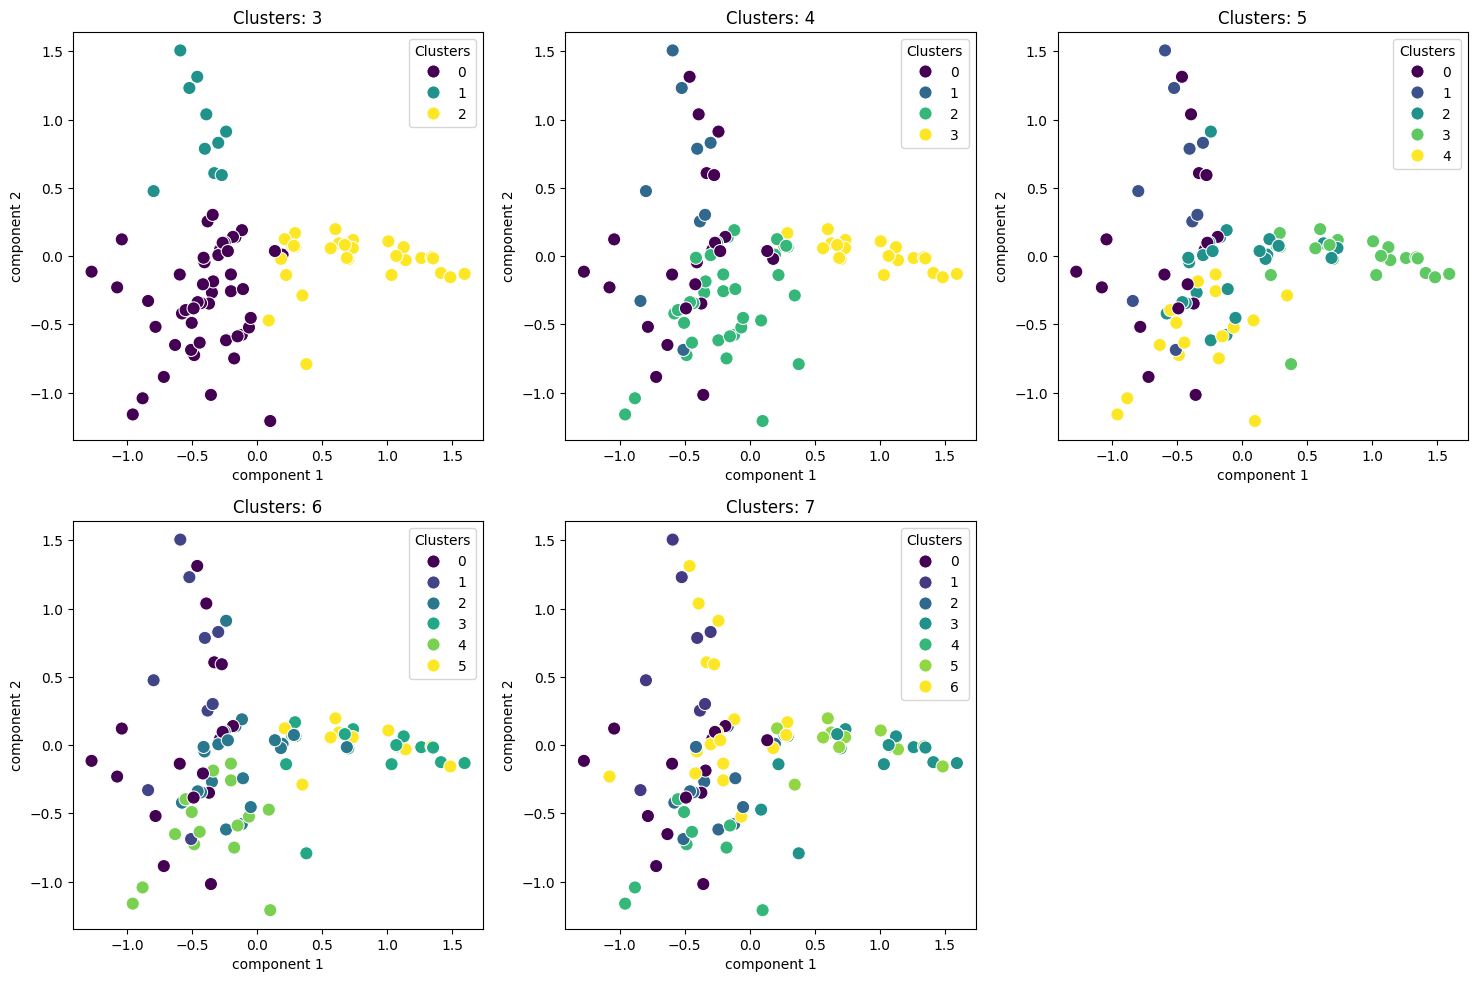

In [ ]:
# Definir rango de clusters
n=range(3,8)

# Generar Agrupamiento para cada valor de k y graficar pairplot en Seaborn
fig_n=plt.figure(figsize=(18, 18))

for k in n:
    kmeans = KMeans(n_clusters=k, random_state=9)
    clusters = kmeans.fit_predict(np.array(data_clean2))
    data_clustered = data_clean.copy()
    data_clustered['Cluster'] = clusters
    data_plot = pd.concat([data_pca,data_clustered[['Cluster']]],axis=1)
    axes=fig_n.add_subplot(3,3,k-2)
    sns.scatterplot(data_plot,
             x='comp1', y='comp2',
             hue='Cluster',
             palette='viridis',
             s=90
             )
    axes.set_title(f'Clusters: {k}')
    axes.set_xlabel('component 1')
    axes.set_ylabel('component 2')
    axes.legend(title='Clusters')
plt.show()



*Se puede apreciar que para clusters mayores a 3, la clasifcación se vuelve muy dispersa y no representa un agrupamiento adecuado*

## Definir algoritmo

In [ ]:
# Definir y aplicar algoritmo de k-medios en base a los clusters elegidos
kmeans = KMeans(n_clusters=3, random_state=9)
clusters = kmeans.fit_predict(np.array(data_clean2))

data_clustered = data_clean.copy()

# Añadir etiqueta de cluster a la data original
data_clustered['Cluster'] = clusters

# Añadir etiqueta de cluster a la data relavante (PCA)
data_plot = pd.concat([data_pca,data_clustered[['Cluster']]],axis=1)

data_plot


,comp1,comp2,apellido,Cluster
0,1.007580,0.108215,Adams,2
1,-0.287539,0.044715,Allen,0
2,-0.392032,1.038391,Anderson,1
3,0.699477,-0.022542,Bailey,2
4,0.088183,-0.471695,Baker,2
...,...,...,...,...
95,-0.151666,-0.587844,Williams,0
96,0.688224,-0.013688,Wilson,2
97,-0.551215,-0.395670,Wood,0
98,-0.489805,-0.383307,Wright,0


## Graficar resultados de la clasificación

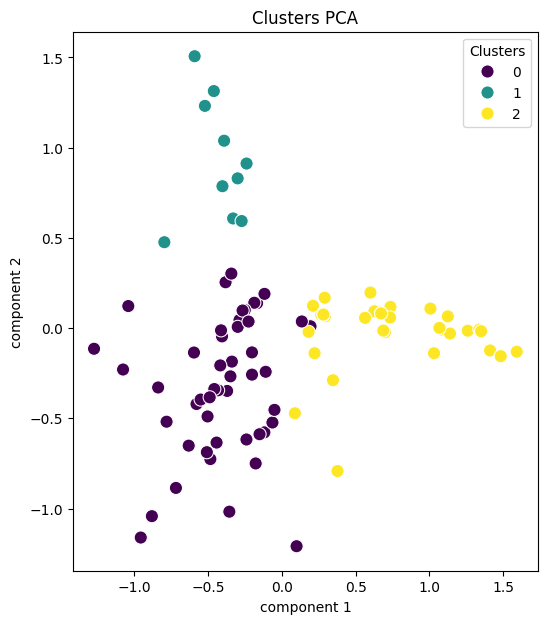

In [ ]:
# Gráfica de pairplot en Seaborn
plt.figure(figsize=(6, 7))
sns.scatterplot(data_plot,
             x='comp1', y='comp2',
             hue='Cluster',
             palette='viridis',
             s=90
             )
plt.title('Clusters PCA')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.legend(title='Clusters')
plt.show()



# RESULTADOS

## Ordenar data

In [ ]:
# Devolver etiquetas de clusters a la data de promociones
df = pd.merge(data_plot, data_original, how='outer', on = 'apellido')

# Generar columna de variedad por tipo de vino
variedad_dict = {'Espumante':'Blanco',
                 'Pinot Grigio':'Tinto',
                 'Malbec':'Tinto',
                 'Chardonnay':'Blanco',
                 'Champagne':'Blanco',
                 'Pinot Noir':'Tinto',
                 'Prosecco':'Blanco',
                 'Cabernet Sauvignon':'Tinto',
                 'Merlot':'Tinto'}

df['variedad_tipo'] = df['variedad'].map(variedad_dict)

# Generar columna de continente origen
continente_dict = {'Oregon':'N América',
                   'France':'Europa',
                   'Chile':'S América',
                   'New Zealand':'Oceanía',
                   'Italy':'Europa',
                   'Australia':'Oceanía',
                   'California':'N America',
                   'Germany':'Europa',
                   'South Africa':'África'}

df['continente'] = df['origen'].map(continente_dict)

# Generar columna de trimestre
trim_dict = {'Enero':'1',
                 'Febrero':'1',
                 'Marzo':'1',
                 'Abril':'1',
                 'Mayo':'2',
                 'Junio':'2',
                 'July':'2',
                 'Agosto':'2',
                 'Septiembre':'3',
                 'Octubre':'3',
                 'Noviembre':'3',
                 'Diciembre':'3'
                 }

df['trimestre']=df.campaña.map(trim_dict)

df

,comp1,comp2,apellido,Cluster,promocion,campaña,variedad,cantidad_min,descuento,origen,variedad_tipo,continente,trimestre
0,1.007580,0.108215,Adams,2,18,July,Espumante,6,50,Oregon,Blanco,N América,2
1,1.007580,0.108215,Adams,2,29,Noviembre,Pinot Grigio,6,87,France,Tinto,Europa,3
2,1.007580,0.108215,Adams,2,30,Diciembre,Malbec,6,54,France,Tinto,Europa,3
3,-0.287539,0.044715,Allen,0,9,Abril,Chardonnay,144,57,Chile,Blanco,S América,1
4,-0.287539,0.044715,Allen,0,27,Octubre,Champagne,72,88,New Zealand,Blanco,Oceanía,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,-0.881994,-1.041788,Young,0,9,Abril,Chardonnay,144,57,Chile,Blanco,S América,1
320,-0.881994,-1.041788,Young,0,15,Junio,Cabernet Sauvignon,144,19,Italy,Tinto,Europa,2
321,-0.881994,-1.041788,Young,0,22,Agosto,Champagne,72,63,France,Blanco,Europa,2
322,-0.881994,-1.041788,Young,0,31,Diciembre,Champagne,72,89,France,Blanco,Europa,3


## Análisis por continente de origen

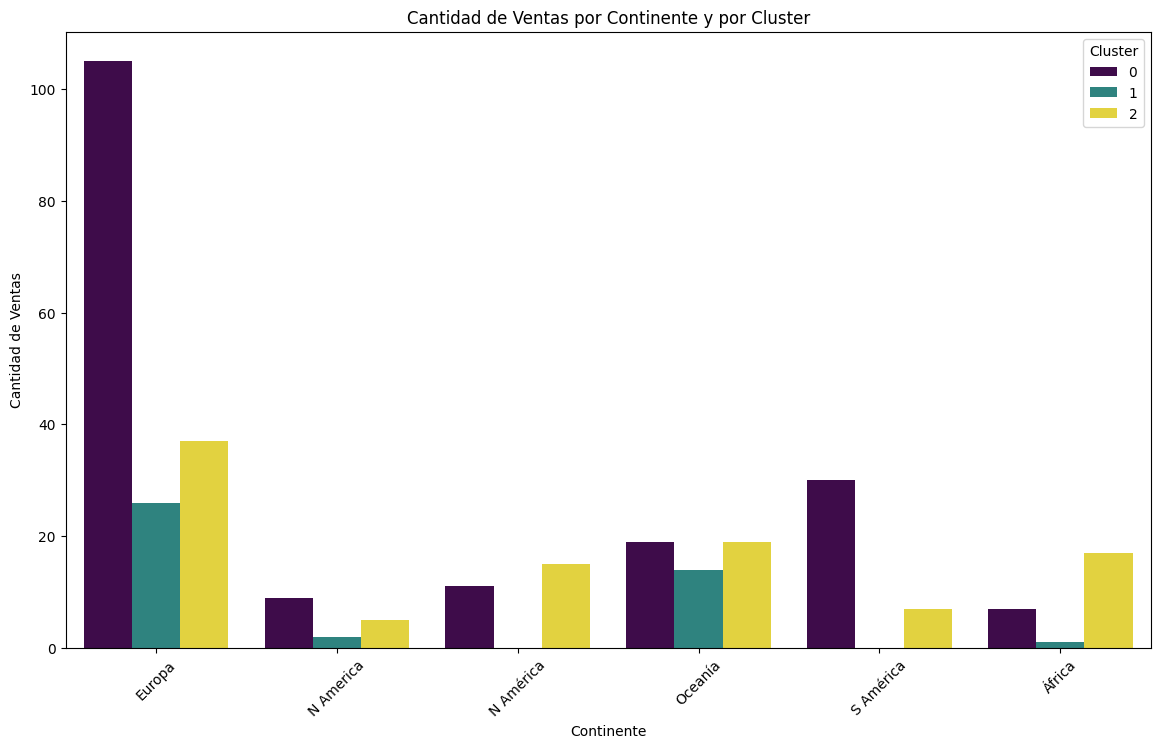

In [ ]:
# Conseguir tabla de continentes
df_cont=df.pivot_table(values='promocion',index='Cluster',columns='continente',aggfunc='count',fill_value=0).reset_index()

df_cont= df_cont.rename_axis(None, axis=1).reset_index(drop=True)

# Anular dinamización de columna
df_melted = df_cont.melt(id_vars='Cluster', var_name='Continente', value_name='Ventas')

# Gráfica de barras de ventas por continente para cada cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Continente', y='Ventas', hue='Cluster', palette='viridis')
plt.title('Cantidad de Ventas por Continente y por Cluster')
plt.xlabel('Continente')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

## Análisis por tipo de vino

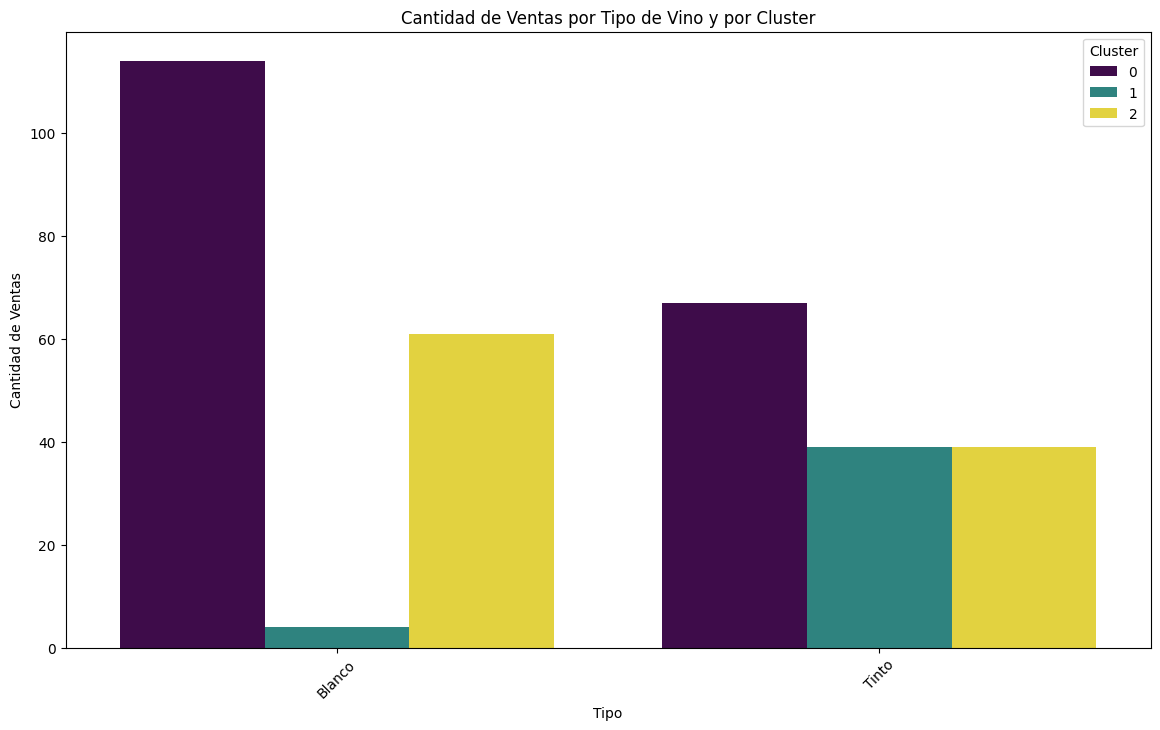

In [ ]:
# Conseguir tabla de tipos
df_tipo =df.pivot_table(values='promocion',index='Cluster',columns='variedad_tipo',aggfunc='count',fill_value=0).reset_index()

df_tipo= df_tipo.rename_axis(None, axis=1).reset_index(drop=True)

# Anular dinamización de columna
df_tipo = df_tipo.melt(id_vars='Cluster', var_name='Tipo', value_name='Ventas')

# Gráfica de barras de ventas por tipo para cada cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=df_tipo, x='Tipo', y='Ventas', hue='Cluster', palette='viridis')
plt.title('Cantidad de Ventas por Tipo de Vino y por Cluster')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

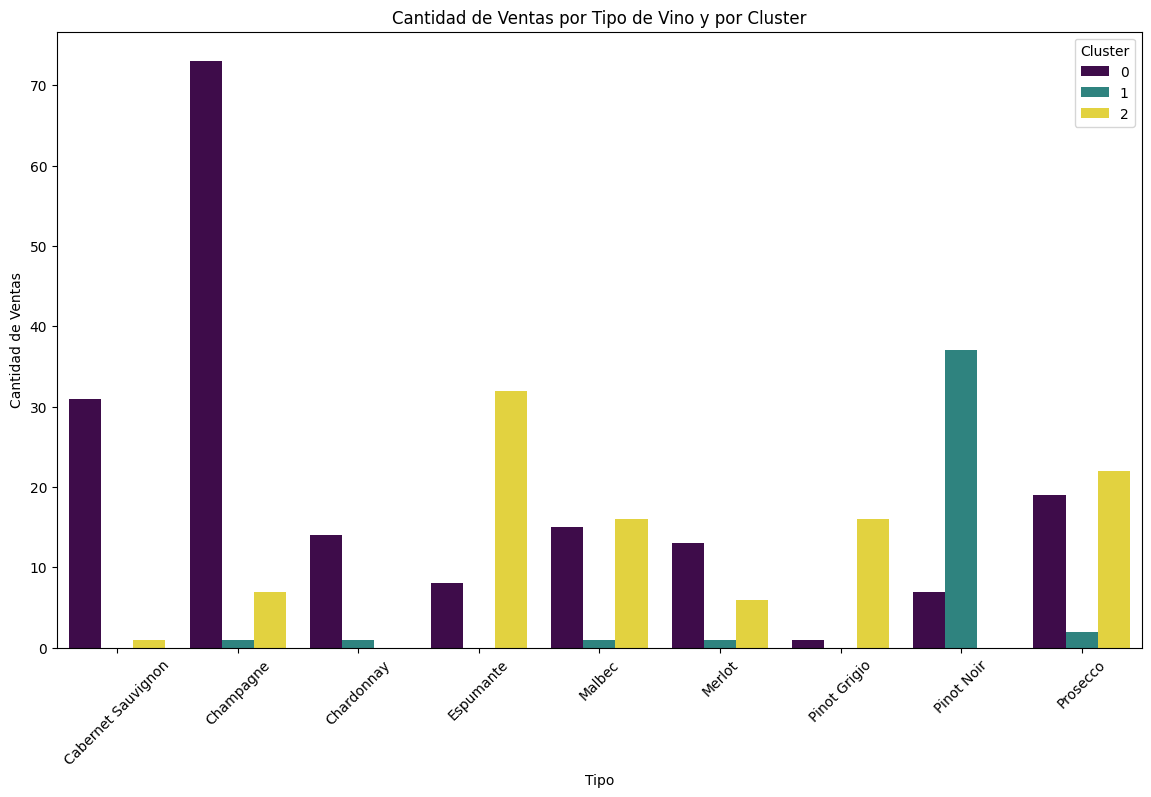

In [ ]:
# Conseguir tabla de Variedades
df_variedad =df.pivot_table(values='promocion',index='Cluster',columns='variedad',aggfunc='count',fill_value=0).reset_index()

df_variedad= df_variedad.rename_axis(None, axis=1).reset_index(drop=True)

# Anular dinamización de columna
df_variedad = df_variedad.melt(id_vars='Cluster', var_name='Variedad', value_name='Ventas')

# Gráfica de barras de ventas por tipo para cada cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=df_variedad, x='Variedad', y='Ventas', hue='Cluster', palette='viridis')
plt.title('Cantidad de Ventas por Tipo de Vino y por Cluster')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

# Análisis por fecha de promoción

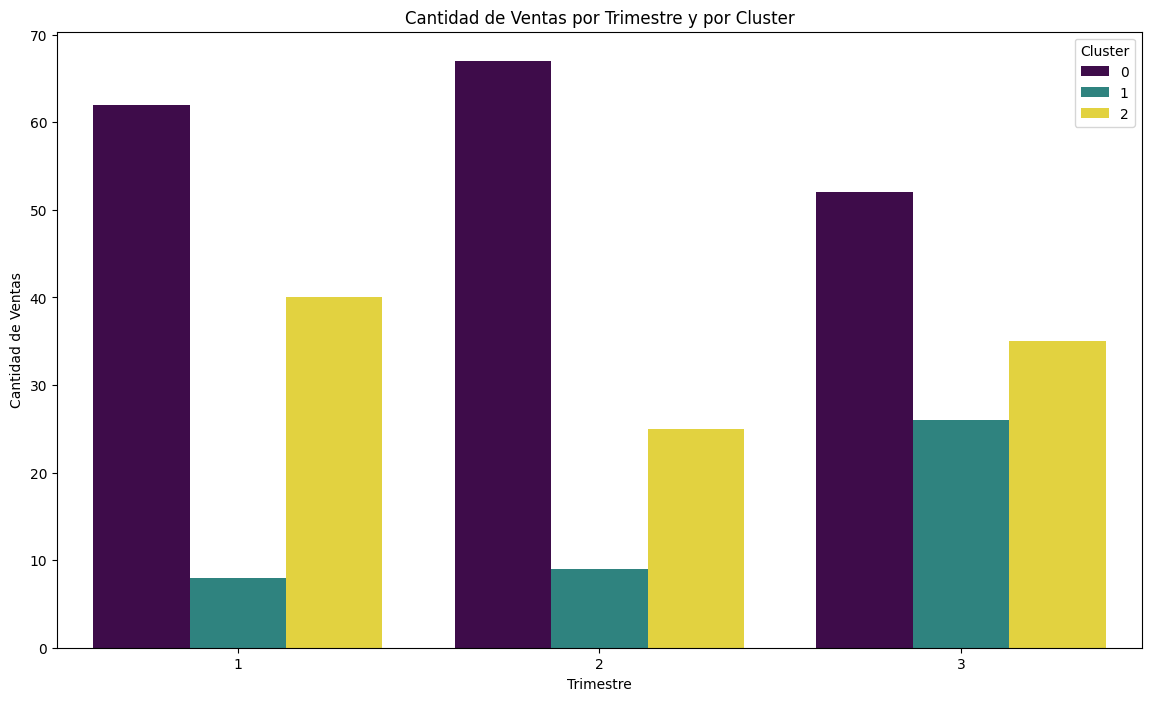

In [ ]:
# Conseguir tabla de trimestres
df_trim =df.pivot_table(values='promocion',index='Cluster',columns='trimestre',aggfunc='count',fill_value=0).reset_index()

df_trim= df_trim.rename_axis(None, axis=1).reset_index(drop=True)

# Anular dinamización de columna
df_trim = df_trim.melt(id_vars='Cluster', var_name='Trimestre', value_name='Ventas')

# Gráfica de barras de ventas por tipo para cada cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=df_trim, x='Trimestre', y='Ventas', hue='Cluster', palette='viridis')
plt.title('Cantidad de Ventas por Trimestre y por Cluster')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.show()

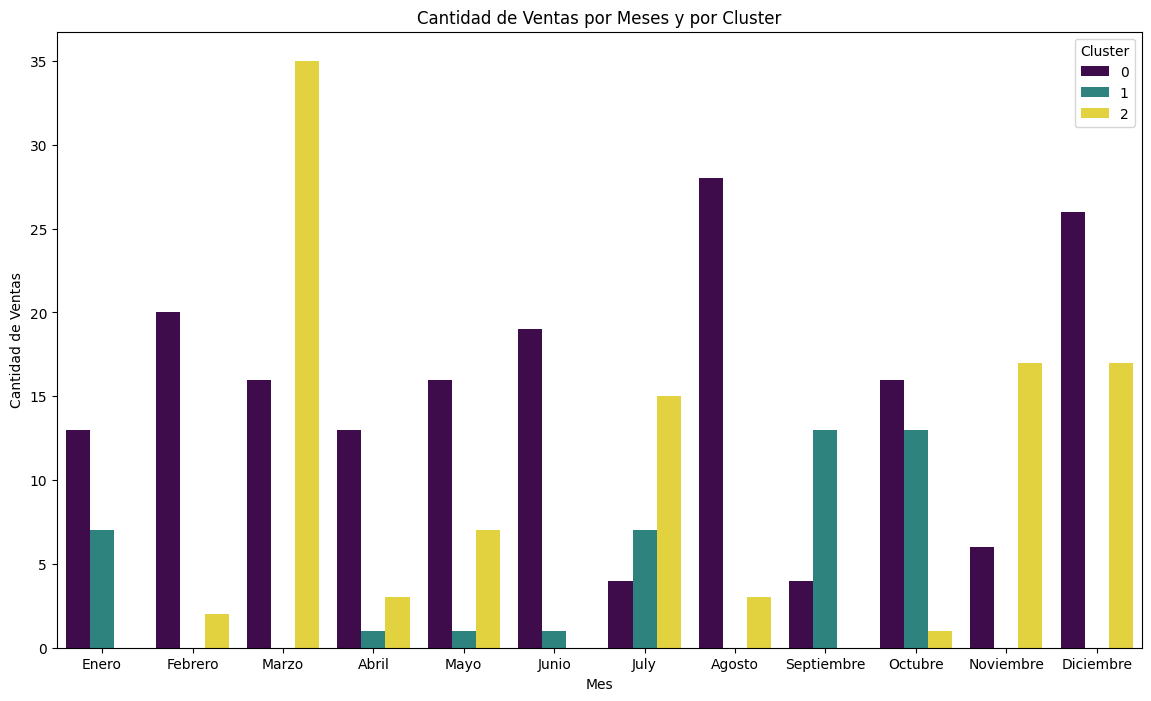

In [ ]:
# Conseguir tabla de meses
df_mes =df.pivot_table(values='promocion',index='Cluster',columns='campaña',aggfunc='count',fill_value=0).reset_index()

df_mes= df_mes.rename_axis(None, axis=1).reset_index(drop=True)

# Anular dinamización de columna
df_mes = df_mes.melt(id_vars='Cluster', var_name='Meses', value_name='Ventas')

# Añadir número de mes en función de Meses
df_mes['Meses_num']=df_mes['Meses'].map({'Enero':1,
                                         'Febrero':2,
                                         'Marzo':3,
                                         'Abril':4,
                                         'Mayo':5,
                                         'Junio':6,
                                         'July':7,
                                         'Agosto':8,
                                         'Septiembre':9,
                                         'Octubre':10,
                                         'Noviembre':11,
                                         'Diciembre':12})

# Ordenar meses por número de mes
df_mes = df_mes.sort_values(by='Meses_num')


# Gráfica de barras de ventas por tipo para cada cluster
plt.figure(figsize=(14, 8))
sns.barplot(data=df_mes, x='Meses', y='Ventas', hue='Cluster', palette='viridis')
plt.title('Cantidad de Ventas por Meses y por Cluster')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.show()

*Se puede determinar para cada grupo de clientes:*


*   El grupo 0 tiene preferencia por los vinos blancos de procedencia Europea, concretamente, el Champagne. Además, sus pedidos son constantes, pero menos frecuentes en julio, septiembre y noviembre.
*   El grupo 1 tiene preferencia por vinos Europeos; sin embargo, tiene igual afinidad por tinos como secos, siendo los más buscados el Espumante en secos y, Prosecco, Malbec y Pinot Noir en tintos. Sus pedidos son mayores en marzo, y contantes en julio, noviembre y diciembre; sin embargo, bajos o nulos en los otros meses.
*   El grupo 2 tiene preferencia por vinos tintos de procedencia europea, consumen casi en su totalidad Pinot Noir. Sus compras son mayores en el último trimestre del año, concretamente en setiembre y octubre.





